# Chapter 6 - Exercises
Applied Questions

Name : Suraj Meshram

Roll No. - MT2114

# ----------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LinearRegression

8. In this exercise, we will generate simulated data, and will then use this data to perform best subset selection.

(a) Use the rnorm() function to generate a predictor X of length n = 100, as well as a noise vector of length n = 100.

In [2]:
np.random.seed(1)

X = np.random.randn(100)
eps = np.random.randn(100)
print('Size of X is ',len(X))

Size of X is  100


(b) Generate a response vector Y of length n = 100 according to the model

Y = β0 + β1X + β2X2 + β3X3 + eps


In [3]:
# weights are of our choice
beta = [3,4,2,1]
Y = beta[0] + beta[1]*X + beta[2]*X**2 + beta[3]*X**3 + eps

(c) Use the regsubsets() function to perform best subset selection in order to choose the best model containing the predictors X, X2,...,X10. What is the best model obtained according to Cp, BIC, and adjusted R2? Show some plots to provide evidence for your answer, and report the coefficients of the best model obtained.

In [4]:
poly = PolynomialFeatures(10,include_bias=False)
predictors = poly.fit_transform(pd.DataFrame({'X':X}))
predictors = pd.DataFrame(predictors)
#print(predictors)
col = ['X' + str(i) for i in range(1,11)]
predictors.columns = col
predictors.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1.624345,2.638498,4.285832,6.961671,11.308158,18.368354,29.836551,48.464863,78.723675,127.874436
1,-0.611756,0.374246,-0.228947,0.140060,-0.085683,0.052417,-0.032066,0.019617,-0.012001,0.007342
2,-0.528172,0.278965,-0.147342,0.077822,-0.041103,0.021710,-0.011466,0.006056,-0.003199,0.001689
3,-1.072969,1.151262,-1.235268,1.325403,-1.422116,1.525886,-1.637228,1.756694,-1.884878,2.022415
4,0.865408,0.748930,0.648130,0.560897,0.485404,0.420073,0.363534,0.314605,0.272262,0.235617


(f) Now generate a response vector Y according to the model, and perform best subset selection and the lasso. Discuss the results obtained.

Y = β0 + β7X7 + eps


In [5]:
beta = [0.5,2]
Y =  beta[0] + beta[1]*X**7 + eps
#print(Y)

# --------------------------------------------------------------

9. In this exercise, we will predict the number of applications received using the other variables in the College data set.

In [6]:
import os 
os.chdir("c:\workfile")

In [7]:
data = pd.read_csv("College.csv")
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [8]:
data.drop("Unnamed: 0",axis =1 ,inplace=True )
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [9]:
# 1st we convert categorical to numrical
data['Private'] = data['Private'].map({'Yes':1,'No':0})
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [10]:
X_train,X_test,y_train,y_test = train_test_split(data.drop('Apps',axis = 1),
                                        data['Apps'],test_size = 0.3,random_state = 0)

In [11]:
print(X_train.shape)

(543, 17)


In [12]:
print(X_test.shape)

(234, 17)


(b) Fit a linear model using least squares on the training set, and report the test error obtained.

In [14]:
from sklearn.metrics import r2_score

results_dict = {}

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
pred = lin_reg.predict(X_test)
print('Score is ',r2_score(y_test,pred))
results_dict['Least_squares'] = r2_score(y_test,pred)

Score is  0.9086043157818349


(c) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [15]:
from sklearn.linear_model import RidgeCV

alphas = 10**(np.linspace(-4,0,100))
ridge_cv = RidgeCV(alphas = alphas,normalize=True,store_cv_values=True)
ridge_cv.fit(X_train,y_train)

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alphas to: original_alphas * n_samples. 
  warnings.warn(


RidgeCV(alphas=array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146e-04, 4.86260158e-04, 5.33669923e-04, 5.85702082e-04,
       6.42807312e-04, 7.05480231e-0...
       1.17681195e-01, 1.29154967e-01, 1.41747416e-01, 1.55567614e-01,
       1.70735265e-01, 1.87381742e-01, 2.05651231e-01, 2.25701972e-01,
       2.47707636e-01, 2.71858824e-01, 2.98364724e-01, 3.27454916e-01,
       3.59381366e-01, 3.94420606e-01, 4.32876128e-01, 4.75081016e-01,
       5.21400829e-01, 5.72236766e-01, 6.28029144e-01, 6.89261210e-01,
       7.56463328e-01, 8.30217568e-01, 9.11162756e-01, 1.00000000e+00]),
        normalize=True, store_cv_values=True)

In [16]:
print('valur of alpha choosen is ',ridge_cv.alpha_)

valur of alpha choosen is  0.0041320124001153384


Text(0.5, 1.0, 'Ridge Regression')

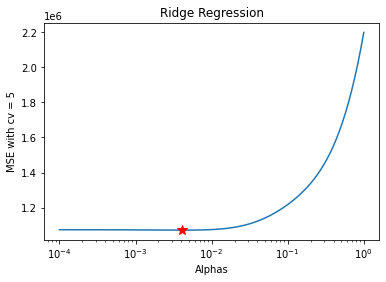

In [18]:
import matplotlib.pyplot as plt
mse_values = ridge_cv.cv_values_
#mse_values.shape
mse_errors = np.mean(mse_values,axis = 0)
plt.plot(ridge_cv.alphas,mse_errors)
plt.plot(ridge_cv.alpha_,np.min(mse_errors),marker = '*',markersize = 10,color = 'red')
plt.xscale('log')
plt.xlabel('Alphas')
plt.ylabel('MSE with cv = 5')
plt.title('Ridge Regression')

In [19]:
pred = ridge_cv.predict(X_test)
print('R2 Score is ',r2_score(y_test,pred))
results_dict['Ridge'] = r2_score(y_test,pred)

R2 Score is  0.9028402319645505


In [21]:
print(pd.Series(np.hstack([ridge_cv.intercept_,ridge_cv.coef_]),index = ['Intercept'] + list(data.drop('Apps',axis = 1).columns)))

Intercept     -418.377749
Private       -686.576113
Accept           1.203935
Enroll          -0.210836
Top10perc       49.876799
Top25perc      -14.321659
F.Undergrad      0.092081
P.Undergrad      0.035984
Outstate        -0.036489
Room.Board       0.225146
Books            0.036336
Personal        -0.048860
PhD             -8.943022
Terminal        -5.093359
S.F.Ratio        4.544561
perc.alumni     -8.628554
Expend           0.065120
Grad.Rate       10.695085
dtype: float64


(d) Fit a lasso model on the training set, with λ chosen by crossvalidation. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [22]:
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,RidgeCV

lasso_cv = LassoCV(alphas = alphas,normalize = True,cv = 10)
lasso_cv.fit(X_train,y_train)

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(alphas=array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146e-04, 4.86260158e-04, 5.33669923e-04, 5.85702082e-04,
       6.42807312e-04, 7.05480231e-0...
       1.17681195e-01, 1.29154967e-01, 1.41747416e-01, 1.55567614e-01,
       1.70735265e-01, 1.87381742e-01, 2.05651231e-01, 2.25701972e-01,
       2.47707636e-01, 2.71858824e-01, 2.98364724e-01, 3.27454916e-01,
       3.59381366e-01, 3.94420606e-01, 4.32876128e-01, 4.75081016e-01,
       5.21400829e-01, 5.72236766e-01, 6.28029144e-01, 6.89261210e-01,
       7.56463328e-01, 8.30217568e-01, 9.11162756e-01, 1.00000000e+00]),
        cv=10, normalize=True)

In [23]:
lasso_cv.alpha_

0.4750810162102798

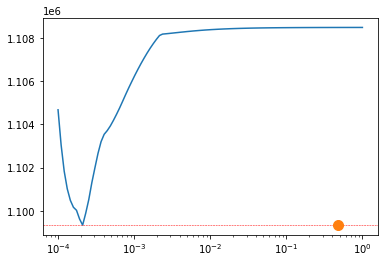

In [24]:
mse_lasso = np.mean(lasso_cv.mse_path_,axis = 1)
plt.plot(lasso_cv.alphas,mse_lasso)
plt.axhline(y = min(mse_lasso),linewidth = 0.5,linestyle = 'dashed',color = 'r')
plt.plot(lasso_cv.alpha_,np.min(mse_lasso),marker = 'o',markersize = 10)
plt.xscale('log')

After lots of hair pulling i am still not ablet to get why this dot is not on the line, please if you can find it, 
 do leave an issue

In [25]:
pred = lasso_cv.predict(X_test)
print('R2 score is ',r2_score(y_test,pred))
results_dict['Lasso'] = r2_score(y_test,pred)

R2 score is  0.9034594192776941


In [26]:
print(pd.Series(np.hstack([lasso_cv.intercept_,lasso_cv.coef_]),index = ['Intercept'] + list(data.drop('Apps',axis = 1).columns)))

Intercept     -465.630008
Private       -670.751294
Accept           1.199801
Enroll          -0.000000
Top10perc       44.166457
Top25perc       -9.580167
F.Undergrad      0.054075
P.Undergrad      0.030898
Outstate        -0.025573
Room.Board       0.205365
Books            0.000000
Personal        -0.018548
PhD             -7.816703
Terminal        -4.509051
S.F.Ratio        0.000000
perc.alumni     -7.671402
Expend           0.058111
Grad.Rate        8.396615
dtype: float64


Three coefficients are shrunk to zero.

# -----------------------------------------------------------------

10. We have seen that as the number of features used in a model increases, the training error will necessarily decrease, but the test error may not. We will now explore this in a simulated data set¶

(a) Generate a data set with p = 20 features, n = 1,000 observations, and an associated quantitative response vector generated according to the model. where β has some elements that are exactly equal to zero.¶

In [27]:
X = np.random.normal(size = (1000,20))
print('Shape of X is ',X.shape)

Shape of X is  (1000, 20)


In [28]:
np.random.seed(3)

# we are going to select beta in such a way that half of the value contain 0
beta = np.random.randint(-10,10,10)
beta = np.concatenate([beta,np.zeros(10)])
np.random.shuffle(beta)
beta

array([  9.,   0.,   0.,   0.,   0.,   0.,  -4., -10.,   0.,   0.,  -2.,
         1.,   0.,  -7.,   0.,   0.,   0.,  -1.,   0.,   0.])

In [29]:
beta = np.expand_dims(beta,axis = 1)
beta.shape

(20, 1)

In [30]:
np.random.seed(1)
# Y = X*Beta + eps
# shapees - (1000,1) = (1000,20)*(20,1) + (1000,1)
Y = np.dot(X,beta) + np.random.normal(size = (1000,1))

In [31]:
# Converting it into a dataframe
data = pd.DataFrame(X,columns=['X_' + str(i) for i in range(1,21)])
print(data.shape)
data.head()

(1000, 20)


,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20
0,0.410444,-0.719096,-0.762959,-0.446420,-0.930669,0.395849,0.226992,-0.094350,-0.921557,0.057758,-0.263338,-1.097054,-1.803579,0.205810,-0.303640,-1.678214,1.506766,-0.681425,0.574622,-1.515758
1,-0.213175,-0.532299,0.342087,-1.586459,-1.007328,2.677643,0.718302,-0.082678,-0.513678,-0.124617,-0.438768,-1.589194,0.368750,-1.825914,0.312024,0.199917,0.354442,1.484433,-0.277343,-1.225871
2,2.618032,-2.157299,-1.239550,0.138052,-1.275739,0.667743,-0.352651,-1.086572,-1.268559,0.010079,1.334289,0.244716,0.365815,-0.483129,1.274984,-1.061585,1.001921,0.495380,0.186772,1.175674
3,-0.016844,2.058922,-1.384259,0.037915,0.275998,0.317659,-0.224200,0.112809,2.450289,-1.822410,0.788957,0.114624,-0.532782,0.184201,-0.082332,-1.938192,-1.710514,-0.830703,-0.730943,-0.019587
4,-0.409501,0.258779,0.838085,0.174673,1.373440,1.196078,0.268100,1.552374,-0.877470,-0.000402,0.306365,-1.079155,1.544823,-0.572645,0.664711,0.215609,-1.114301,0.714626,0.487724,-2.817440


(b) Split your data set into a training set containing 100 observations and a test set containing 900 observations

In [36]:
X_train,X_test,y_train,y_test = train_test_split(data,Y,test_size = 0.9,random_state = 1)
print('Shape of X_train and X_test are respecitively ',X_train.shape,X_test.shape)

Shape of X_train and X_test are respecitively  (100, 20) (900, 20)


# ---------------------------------------------------------------

In [37]:
from sklearn.datasets import load_boston
boston = load_boston()

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [38]:
data = pd.DataFrame(boston.data,columns = boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [39]:
predictors = data.drop('CRIM',axis = 1)
y = data['CRIM']
predictors.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


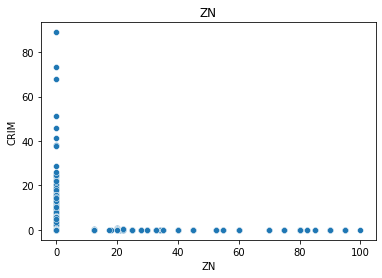

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


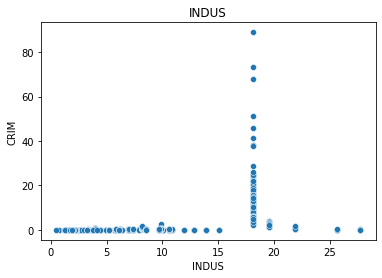

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


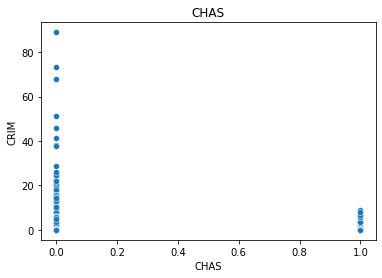

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


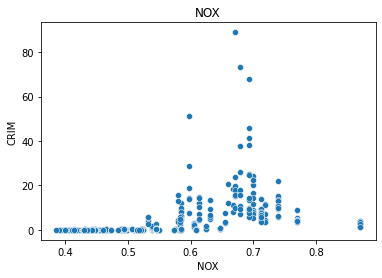

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


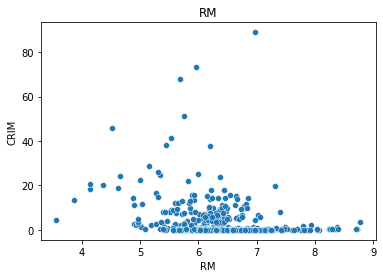

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


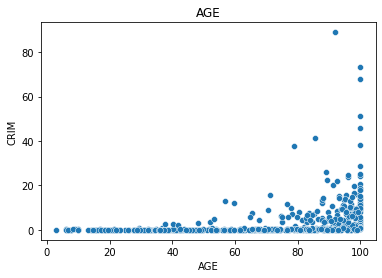

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


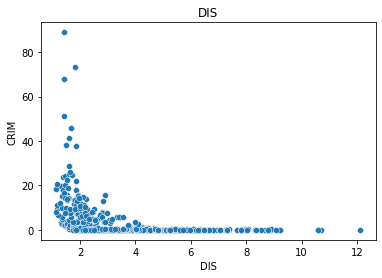

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


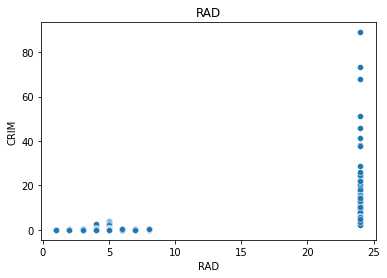

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


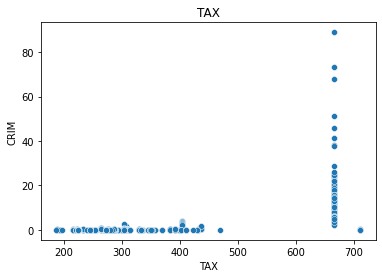

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


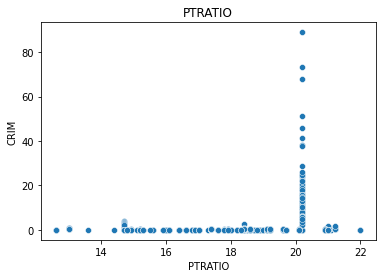

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


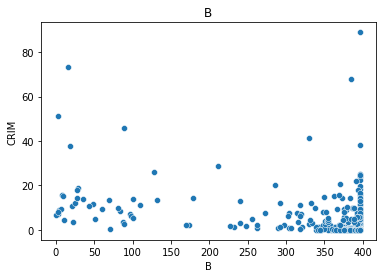

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


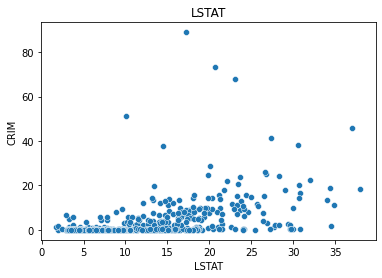

In [41]:
import seaborn as sns
for feature in predictors.columns:
    sns.scatterplot(predictors[feature],data['CRIM'])
    plt.title(feature)
    plt.show()

(a) Try out some of the regression methods explored in this chapter, such as best subset selection, the lasso, ridge regression, and PCR. Present and discuss results for the approaches that you consider.

In [42]:
# Best subset selection
results_dict = {}

hand_selected_features = ['NOX','DIS','RAD','LSTAT']
lin_reg = LinearRegression()
error = cross_val_score(lin_reg,predictors[hand_selected_features],y,cv = 5,scoring = 'neg_mean_squared_error')
print('Error for best subset selection is ',-np.mean(error))
results_dict['Best_subset'] = -np.mean(error)

Error for best subset selection is  44.46861428992999


In [43]:
# Least Squares
lin_reg = LinearRegression()
error = cross_val_score(lin_reg,predictors,y,cv = 5,scoring = 'neg_mean_squared_error')
print('Error for best subset selection is ',-np.mean(error))
results_dict['least_squares'] = -np.mean(error)

Error for best subset selection is  48.57680751139624


In [44]:
#RIdge Regression

ridgecv = RidgeCV(alphas = 10**np.linspace(-4,0,100),normalize = True,store_cv_values=True)
ridgecv.fit(predictors,y)
#lets look at the shape of cv values
ridgecv.cv_values_.shape

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alphas to: original_alphas * n_samples. 
  warnings.warn(


(506, 100)

In [45]:
print("The best score for ridge regression is ",ridgecv.score(predictors,y))
results_dict['Ridge'] = ridgecv.score(predictors,y)

The best score for ridge regression is  0.44152817621421947


Text(0, 0.5, 'CV ERROR MSE')

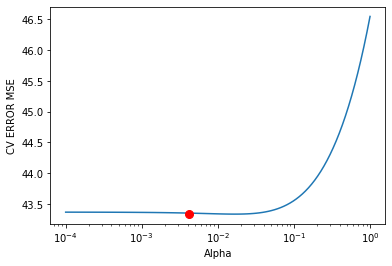

In [46]:
# Cv value are having a shape of (506,100), which means that for each alpha we have to take mean at axis = 0, t0
# get mean cv values. 506 suggets that it is LOOCV
mse_cv = np.mean(ridgecv.cv_values_,axis = 0)
plt.plot(ridge_cv.alphas,mse_cv)
plt.plot(ridge_cv.alpha_,np.min(mse_cv),marker = 'o',color = 'red',markersize = 8)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('CV ERROR MSE')


In [47]:
# We will use hstack, for horizontal stacing of numpy arrays, for vertical we would use vstack
pd.Series(np.hstack([ridgecv.intercept_,ridgecv.coef_]),index = ['Intercept'] + list(predictors.columns))

Intercept    8.217616
ZN           0.033446
INDUS       -0.078059
CHAS        -1.244094
NOX         -5.822660
RM          -0.289045
AGE          0.001512
DIS         -0.656616
RAD          0.486683
TAX          0.001082
PTRATIO     -0.060691
B           -0.009707
LSTAT        0.229104
dtype: float64

In [49]:
# Lasso
lassocv = LassoCV(alphas = 10**np.linspace(-4,0,100),normalize = True,cv = 5)
lassocv.fit(predictors,y)

lassocv.mse_path_.shape

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


(100, 5)

In [50]:
print("The best score for lasso is ",lassocv.score(predictors,y))
results_dict['Lasso'] = lassocv.score(predictors,y)

The best score for lasso is  0.425720149350171


Text(0, 0.5, 'CV ERROR MSE')

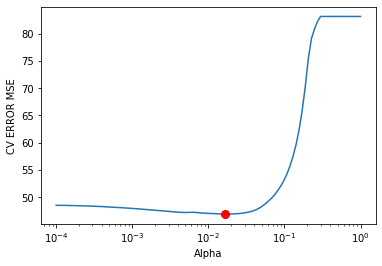

In [51]:
# in this case we will take the mean at axis = 1
mse_cv = np.mean(lassocv.mse_path_,axis = 1)
plt.plot(lassocv.alphas_,mse_cv)
plt.plot(lassocv.alpha_,np.min(mse_cv),marker = 'o',color = 'red',markersize = 8)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('CV ERROR MSE')


In [52]:
pd.Series(np.hstack([lassocv.intercept_,lassocv.coef_]),index = ['Intercept'] + list(predictors.columns))

Intercept   -0.545888
ZN           0.000000
INDUS        0.000000
CHAS        -0.000000
NOX          0.000000
RM          -0.000000
AGE          0.000000
DIS         -0.023275
RAD          0.466255
TAX          0.000000
PTRATIO     -0.000000
B           -0.007033
LSTAT        0.182062
dtype: float64

8 coefficients have been reduced to 0 weights

(b) Propose a model (or set of models) that seem to perform well on this data set, and justify your answer. Make sure that you are evaluating model performance using validation set error, crossvalidation, or some other reasonable alternative, as opposed to using training error.

In [53]:
pd.DataFrame(results_dict,index = ['Error']).T.sort_values(by = 'Error')

,Error
Lasso,0.425720
Ridge,0.441528
Best_subset,44.468614
least_squares,48.576808


(c) Does your chosen model involve all of the features in the data set? Why or why not?

Ans: No the choosen model, does not contain all the features. In fact, 8 of the features, have 0 coefficients.